In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, zscore
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Ex. 3.2

Local C.I.: $$(X\hat{\beta}-\sqrt{\mathrm{diag}(X(X^TX)^{-1}X^T)}z^{(1-\alpha/2)}\hat{\sigma}, X\hat{\beta}+\sqrt{\mathrm{diag}(X(X^TX)^{-1}X^T)}z^{(1-\alpha/2)}\hat{\sigma})$$

Global C.I.: $$(X\hat{\beta}-\sqrt{\mathrm{diag}(X(X^TX)^{-1}X^T)}\sqrt{{\chi_{p+1}^2}^{(1-\alpha)}}\hat{\sigma}, X\hat{\beta}+\sqrt{\mathrm{diag}(X(X^TX)^{-1}X^T)}\sqrt{{\chi_{p+1}^2}^{(1-\alpha)}}\hat{\sigma})$$

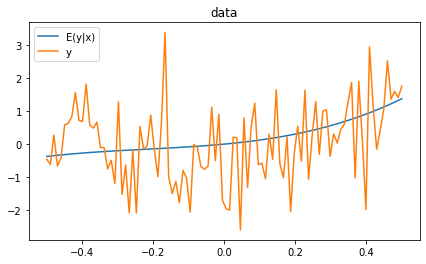

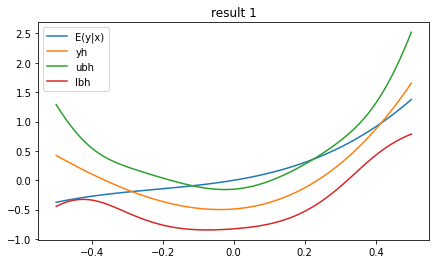

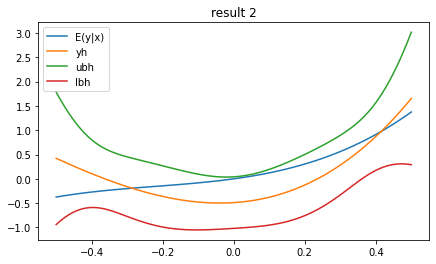

Xsigmah/zsigmah: 1.571567523415939


In [2]:
x = np.linspace(-0.5, 0.5, 100)
Eyx = 0 + x + 2*(x**2) + 3*(x**3)
y = Eyx + norm.rvs(size=x.size)
fig,ax=plt.subplots(figsize=(7,4))
ax.plot(x, Eyx, label='E(y|x)')
ax.plot(x, y, label='y')
ax.set_title('data')
ax.legend()
plt.show()

X = np.array([np.ones_like(x), x, x**2, x**3]).T
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
yh = X.dot(beta)
sigmah = np.sum((y - yh)**2) / (y.size - 4)
zsigmah = norm.ppf(0.975) * sigmah
bound = np.sqrt(np.diag(X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)))
fig,ax=plt.subplots(figsize=(7,4))
ax.plot(x, Eyx, label='E(y|x)')
ax.plot(x, yh, label='yh')
ax.plot(x, yh + zsigmah * bound, label='ubh')
ax.plot(x, yh - zsigmah * bound, label='lbh')
ax.set_title('result 1')
ax.legend()
plt.show()

Xsigmah = np.sqrt(chi2(df=4).ppf(0.95)) * sigmah
fig,ax=plt.subplots(figsize=(7,4))
ax.plot(x, Eyx, label='E(y|x)')
ax.plot(x, yh, label='yh')
ax.plot(x, yh + Xsigmah * bound, label='ubh')
ax.plot(x, yh - Xsigmah * bound, label='lbh')
ax.set_title('result 2')
ax.legend()
plt.show()
print('Xsigmah/zsigmah: {}'.format(Xsigmah/zsigmah))

## Ex. 3.17

In [3]:
predictors = pd.read_csv('./data/prostate', sep=' ', index_col=0)
train = predictors.pop('train')
response = predictors.pop('lpsa')
predictors = predictors.apply(zscore)
display(predictors[train == 'T'].corr())
predictors['constant'] = 1

X = predictors[train == 'T'].values
y = response[train == 'T'].values
X_test = predictors[train == 'F'].values
y_test = response[train == 'F'].values

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000


In [4]:
beta_ls = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
display(list(zip(predictors.columns,beta_ls)))
test_err = np.mean((X_test.dot(beta_ls) - y_test) ** 2)

[('lcavol', 0.6760163443892502),
 ('lweight', 0.2616936092638182),
 ('age', -0.14073374423100665),
 ('lbph', 0.20906052123209318),
 ('svi', 0.30362332249853136),
 ('lcp', -0.28700184375214355),
 ('gleason', -0.021194934506173158),
 ('pgg45', 0.2655761365426025),
 ('constant', 2.464932922123745)]

## Ex. 3.28

[1.666  2.195  1.8007] -0.2143
[1.6001 1.0547 1.1396] 0.1735
[1.6735 2.1842 1.7837] -0.2106
[0.8    0.5273 0.5698 0.8    0.5273 0.5698] 0.1735
[1.6735 2.1842 1.7837 0.     0.     0.    ] -0.2106


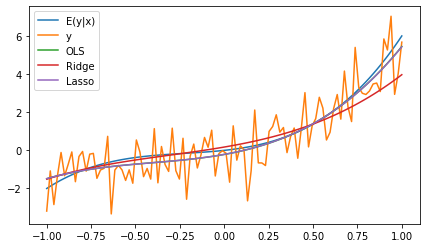

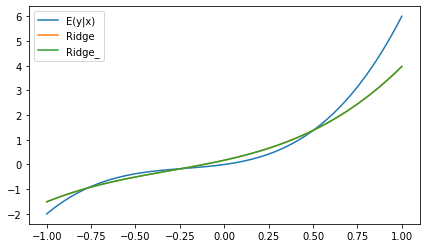

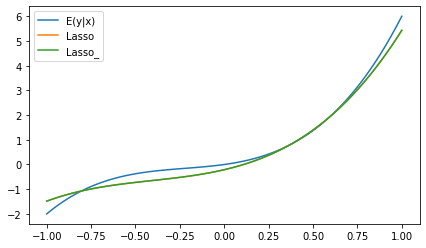

In [5]:
x = np.linspace(-1, 1, 100)
Eyx = 0 + x + 2*(x**2) + 3*(x**3)
y = Eyx + norm.rvs(size=x.size)

alpha1 = 10
alpha2 = 0.001

X = np.array([x, x**2, x**3]).T
fit1 = LinearRegression().fit(X, y)
print(np.round(fit1.coef_, 4), np.round(fit1.intercept_, 4))
fit2 = Ridge(alpha=alpha1).fit(X, y)
print(np.round(fit2.coef_, 4), np.round(fit2.intercept_, 4))
fit3 = Lasso(alpha=alpha2).fit(X, y)
print(np.round(fit3.coef_, 4), np.round(fit3.intercept_, 4))

X2 = np.array([x, x**2, x**3, x, x**2, x**3]).T
fit2_ = Ridge(alpha=alpha1*2).fit(X2, y)
print(np.round(fit2_.coef_, 4), np.round(fit2_.intercept_, 4))
fit3_ = Lasso(alpha=alpha2).fit(X2, y)
print(np.round(fit3_.coef_, 4), np.round(fit3_.intercept_, 4))

fig,ax=plt.subplots(figsize=(7,4))
ax.plot(x, Eyx, label='E(y|x)')
ax.plot(x, y, label='y')
ax.plot(x, fit1.predict(X), label='OLS')
ax.plot(x, fit2.predict(X), label='Ridge')
ax.plot(x, fit3.predict(X), label='Lasso')
ax.legend()
plt.show()

fig,ax=plt.subplots(figsize=(7,4))
ax.plot(x, Eyx, label='E(y|x)')
ax.plot(x, fit2.predict(X), label='Ridge')
ax.plot(x, fit2_.predict(X2), label='Ridge_')
ax.legend()
plt.show()

fig,ax=plt.subplots(figsize=(7,4))
ax.plot(x, Eyx, label='E(y|x)')
ax.plot(x, fit3.predict(X), label='Lasso')
ax.plot(x, fit3_.predict(X2), label='Lasso_')
ax.legend()
plt.show()